### Importación de datos



In [3]:
import pandas as pd
# Se importan los datos para su manejo por tienda
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [8]:
# Pruebass de onsultar los datos y revisar datos dentro  de las bases de datos
# Agrupe el marco de datos por 'Lugar de Compra' y luego obtenga los productos únicos para cada tienda.
products_per_store = tienda.groupby('Lugar de Compra')['Producto'].unique()

# Muestra el resultado
products_per_store


,Producto
Lugar de Compra,
Armenia,"[Cubo mágico 8x8, Estufa, Bloques de construcc..."
Barranquilla,"[Cuerda para saltar, Sillón, Cama king, Cama b..."
Bogotá,"[Asistente virtual, Muñeca bebé, Lavadora de r..."
Bucaramanga,"[Balón de baloncesto, Iphone 15, Dashboards co..."
Cali,"[Microondas, Bloques de construcción, Ciencia ..."
Cartagena,"[Juego de mesa, Lavavajillas, Balón de balonce..."
Cúcuta,"[Sofá reclinable, Tablet ABXY, Microondas, Das..."
Inírida,"[Guitarra eléctrica, Pandereta, Auriculares co..."
Leticia,"[Muñeca bebé, Balón de baloncesto, Cama box, E..."


#1. Análisis de facturación



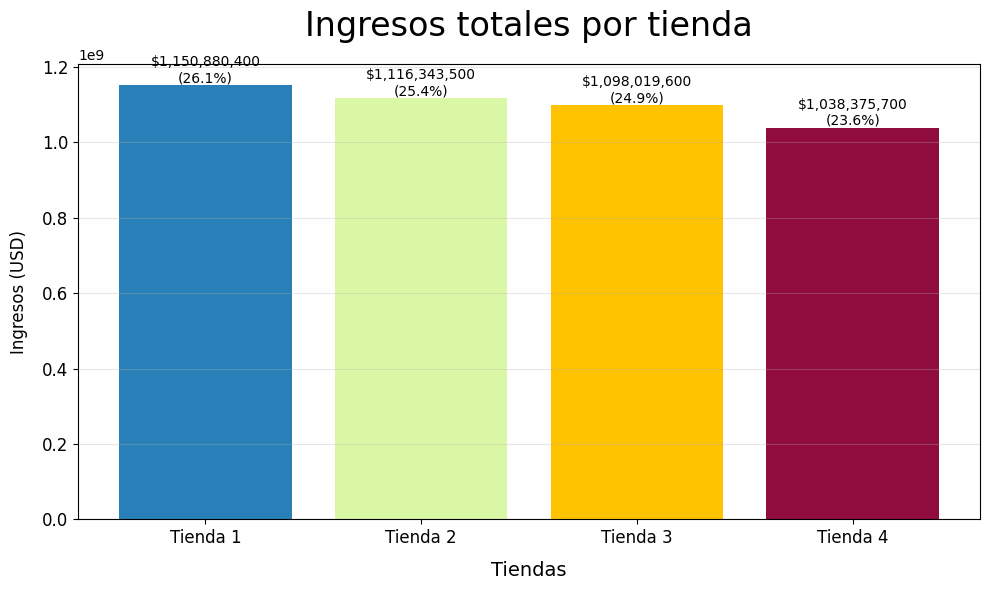

In [9]:
#Pandas como un Excel programable para manipular tablas de datos
#Matplolib como un pintor digitar  para crear  grafibos profesionales
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
# Facilita escalar a mas tiendas manteniedno el dodigo limpio
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
]

# Leer datos y calcular ingresos
ingresos = []
for i, url in enumerate(urls, 1):
    df = pd.read_csv(url)
    total = df['Precio'].sum()
    ingresos.append(total)

# Calcular porcentajes
total_general = sum(ingresos)
porcentajes = [(ingreso / total_general) * 100 for ingreso in ingresos]

# Configurar gráfico
nombres_tiendas = [f'Tienda {i+1}' for i in range(len(urls))]
plt.figure(figsize=(10, 6))
bars = plt.bar(nombres_tiendas, ingresos, color=['#2980b9', '#DAF7A6', '#FFC300', '#900C3F'])

# Añadir etiquetas y porcentajes
for bar, porcentaje in zip(bars, porcentajes):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}\n({porcentaje:.1f}%)',
             ha='center', va='bottom', fontsize=10)

# Personalizar ejes y título
plt.title('Ingresos totales por tienda', fontsize=24, pad=20)
plt.xlabel('Tiendas', fontsize=14, labelpad=10)
plt.ylabel('Ingresos (USD)', fontsize=12, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Mostrar gráfico
plt.tight_layout()
plt.show()

In [11]:
tienda.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [13]:
from matplotlib import pyplot as plt
import seaborn as sns
# se importan librerias para hacer pruebas

In [14]:
tiendas=[tienda,tienda2,tienda3, tienda4]
tiendas
# Nos da un panorama geneal de las tiendas en bruto.

[               Producto Categoría del Producto     Precio  Costo de envío  \
 0     Asistente virtual           Electrónicos   164300.0          6900.0   
 1       Mesa de comedor                Muebles   192300.0          8400.0   
 2         Juego de mesa               Juguetes   209600.0         15900.0   
 3            Microondas      Electrodomésticos   757500.0         41000.0   
 4      Silla de oficina                Muebles   335200.0         20200.0   
 ...                 ...                    ...        ...             ...   
 2354          Iphone 15           Electrónicos  1284400.0         66600.0   
 2355          Impresora           Electrónicos   282800.0         15300.0   
 2356      Juego de mesa               Juguetes   122900.0          7200.0   
 2357           Cama box                Muebles   691300.0         35000.0   
 2358         Smartwatch           Electrónicos   195000.0          8600.0   
 
      Fecha de Compra         Vendedor Lugar de Compra  Califi

In [ ]:
tiendas = pd.concat(tiendas)
tiendas

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
...,...,...,...,...,...,...,...,...,...,...,...,...
2353,Mesa de comedor,Muebles,227700.0,12600.0,12/02/2020,Camila Rivera,Medellín,5,Tarjeta de crédito,1,6.25184,-75.56359
2354,Silla de oficina,Muebles,342000.0,18600.0,17/05/2022,Felipe Santos,Bucaramanga,5,Tarjeta de crédito,3,7.12539,-73.11980
2355,Vaso térmico,Deportes y diversión,36700.0,2400.0,03/05/2022,Camila Rivera,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175
2356,Set de ollas,Artículos para el hogar,151800.0,8300.0,15/06/2020,Blanca Ramirez,Cali,5,Tarjeta de crédito,1,3.43722,-76.52250


In [15]:
import matplotlib

In [16]:
import matplotlib.pyplot as plt

# 2. Ventas por categoría

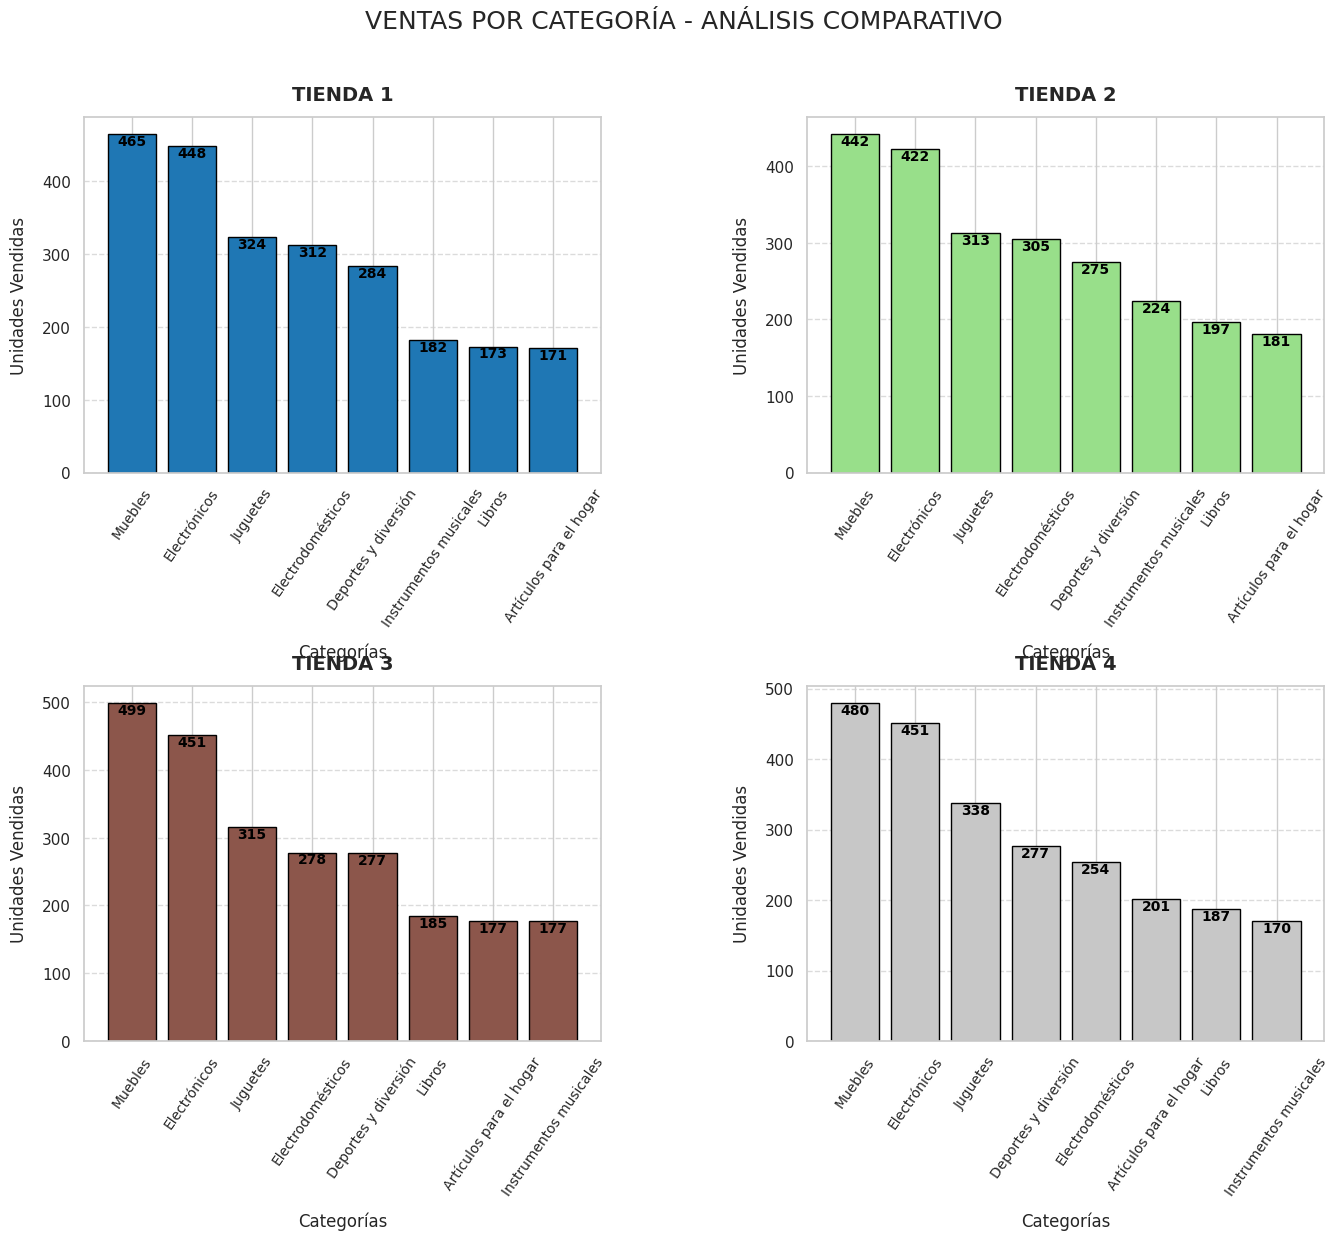

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Configuración mejorada
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
]

# Verificar nombres de columnas
def verificar_columnas(df):
    print("Columnas disponibles en el DataFrame:")
    print(df.columns.tolist())
    return 'Categoría' in df.columns  # Modificar según necesidad

# Procesamiento seguro
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.6, wspace=0.4)
fig.suptitle('VENTAS POR CATEGORÍA - ANÁLISIS COMPARATIVO', fontsize=18, y=0.97)

for i, url in enumerate(urls):
    try:
        df = pd.read_csv(url if url.startswith('http') else f'https://{url}')

        # Verificación y limpieza de columnas
        df.columns = df.columns.str.strip()  # Elimina espacios en nombres de columnas
        columna_categoria = 'Categoría del Producto'  # Nombre exacto verificado

        if columna_categoria not in df.columns:
            verificar_columnas(df)
            raise KeyError(f"Columna '{columna_categoria}' no encontrada")

        # Agrupación segura
        ventas_por_categoria = (
            df.groupby(columna_categoria, observed=True)
            .size()
            .sort_values(ascending=False)
            .reset_index(name='Ventas')
        )

        # Configuración de gráfico
        ax = axs[i//2, i%2]
        bars = ax.bar(
            ventas_por_categoria[columna_categoria],
            ventas_por_categoria['Ventas'],
            color=plt.cm.tab20(i/len(urls)),
            edgecolor='black'
        )

        # Personalización
        ax.set_title(f'TIENDA {i+1}', fontsize=14, fontweight='bold', pad=12)
        ax.set_xlabel('Categorías', fontsize=12, labelpad=10)
        ax.set_ylabel('Unidades Vendidas', fontsize=12, labelpad=10)
        ax.tick_params(axis='x', rotation=55, labelsize=10)
        ax.grid(axis='y', linestyle='--', alpha=0.7)

        # Etiquetas inteligentes
        max_ventas = ventas_por_categoria['Ventas'].max()
        for bar in bars:
            height = bar.get_height()
            va = 'bottom' if height < 0.2*max_ventas else 'top'
            color = 'black' if height < 0.2*max_ventas else 'black'
            ax.text(bar.get_x() + bar.get_width()/2, height,
                    f'{height}',
                    ha='center', va=va, color=color,
                    fontsize=10, fontweight='bold')

    except Exception as e:
        print(f"Error en Tienda {i+1}: {str(e)}")
        axs[i//2, i%2].axis('off')  # Desactiva el subplot con error

plt.show()

# 3. Calificación promedio de la tienda


<ipython-input-22-be77983bf899>:72: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


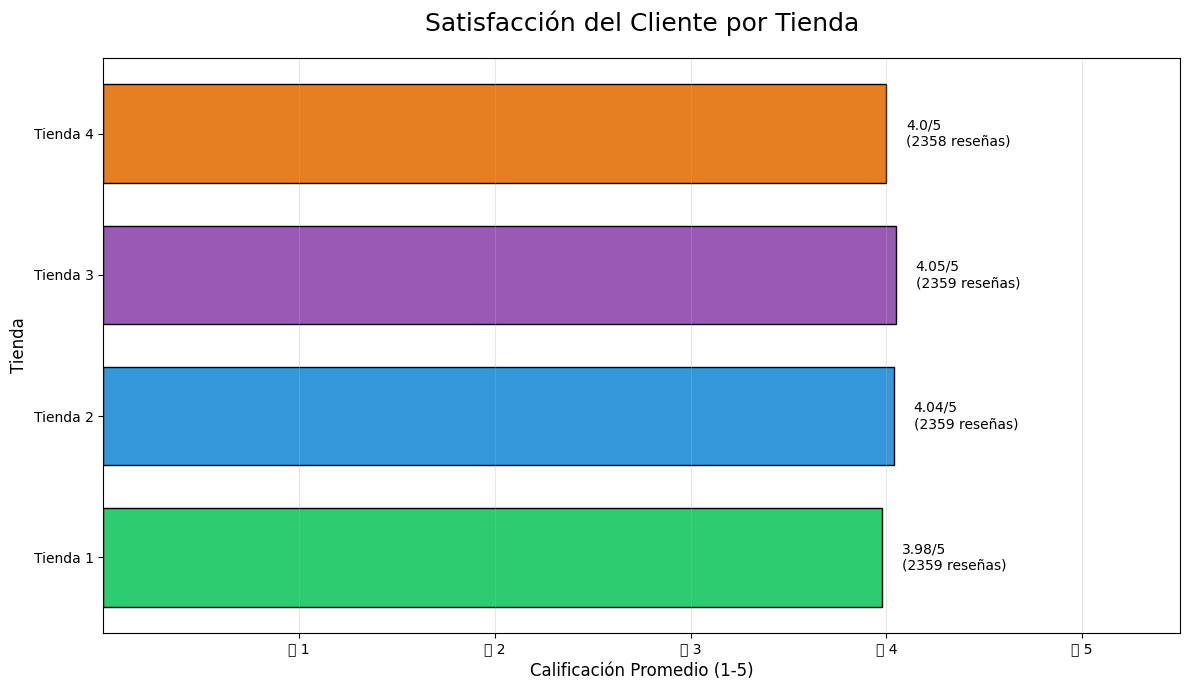

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Configuración inicial
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
]

# Paleta de colores y configuración
COLORES = ['#2ecc71', '#3498db', '#9b59b6', '#e67e22']
ESCALA_CALIFICACION = [1, 2, 3, 4, 5]

def verificar_columna_calificacion(df):
    if 'Calificación' not in df.columns:
        print(f"Columnas disponibles: {df.columns.tolist()}")
        raise KeyError("La columna 'Calificación' no existe en el dataset")

# Procesamiento principal
calificaciones = []
n_reseñas = []

for i, url in enumerate(urls, 1):
    try:
        df = pd.read_csv(url)
        df.columns = df.columns.str.strip()  # Normalizar nombres
        verificar_columna_calificacion(df)

        # Limpieza y validación
        df['Calificación'] = pd.to_numeric(df['Calificación'], errors='coerce')
        df_clean = df.dropna(subset=['Calificación'])
        df_clean = df_clean[(df_clean['Calificación'] >= 1) & (df_clean['Calificación'] <= 5)]

        # Cálculos
        promedio = round(df_clean['Calificación'].mean(), 2)
        calificaciones.append(promedio)
        n_reseñas.append(len(df_clean))

    except Exception as e:
        print(f"Error en Tienda {i}: {str(e)}")
        calificaciones.append(np.nan)
        n_reseñas.append(0)

# Creación del gráfico
plt.figure(figsize=(12, 7))
bars = plt.barh(
    [f'Tienda {i+1}' for i in range(len(urls))],
    calificaciones,
    color=COLORES,
    edgecolor='black',
    height=0.7
)

# Personalización avanzada
plt.title('Satisfacción del Cliente por Tienda', fontsize=18, pad=20)
plt.xlabel('Calificación Promedio (1-5)', fontsize=12)
plt.ylabel('Tienda', fontsize=12)
plt.xlim(0, 5.5)
plt.xticks(ESCALA_CALIFICACION, [f'⭐ {i}' for i in ESCALA_CALIFICACION], fontsize=10)
plt.grid(axis='x', alpha=0.3)

# Anotaciones de datos
for bar, promedio, n in zip(bars, calificaciones, n_reseñas):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
             f'{promedio}/5\n({n} reseñas)',
             va='center', ha='left', fontsize=10,
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

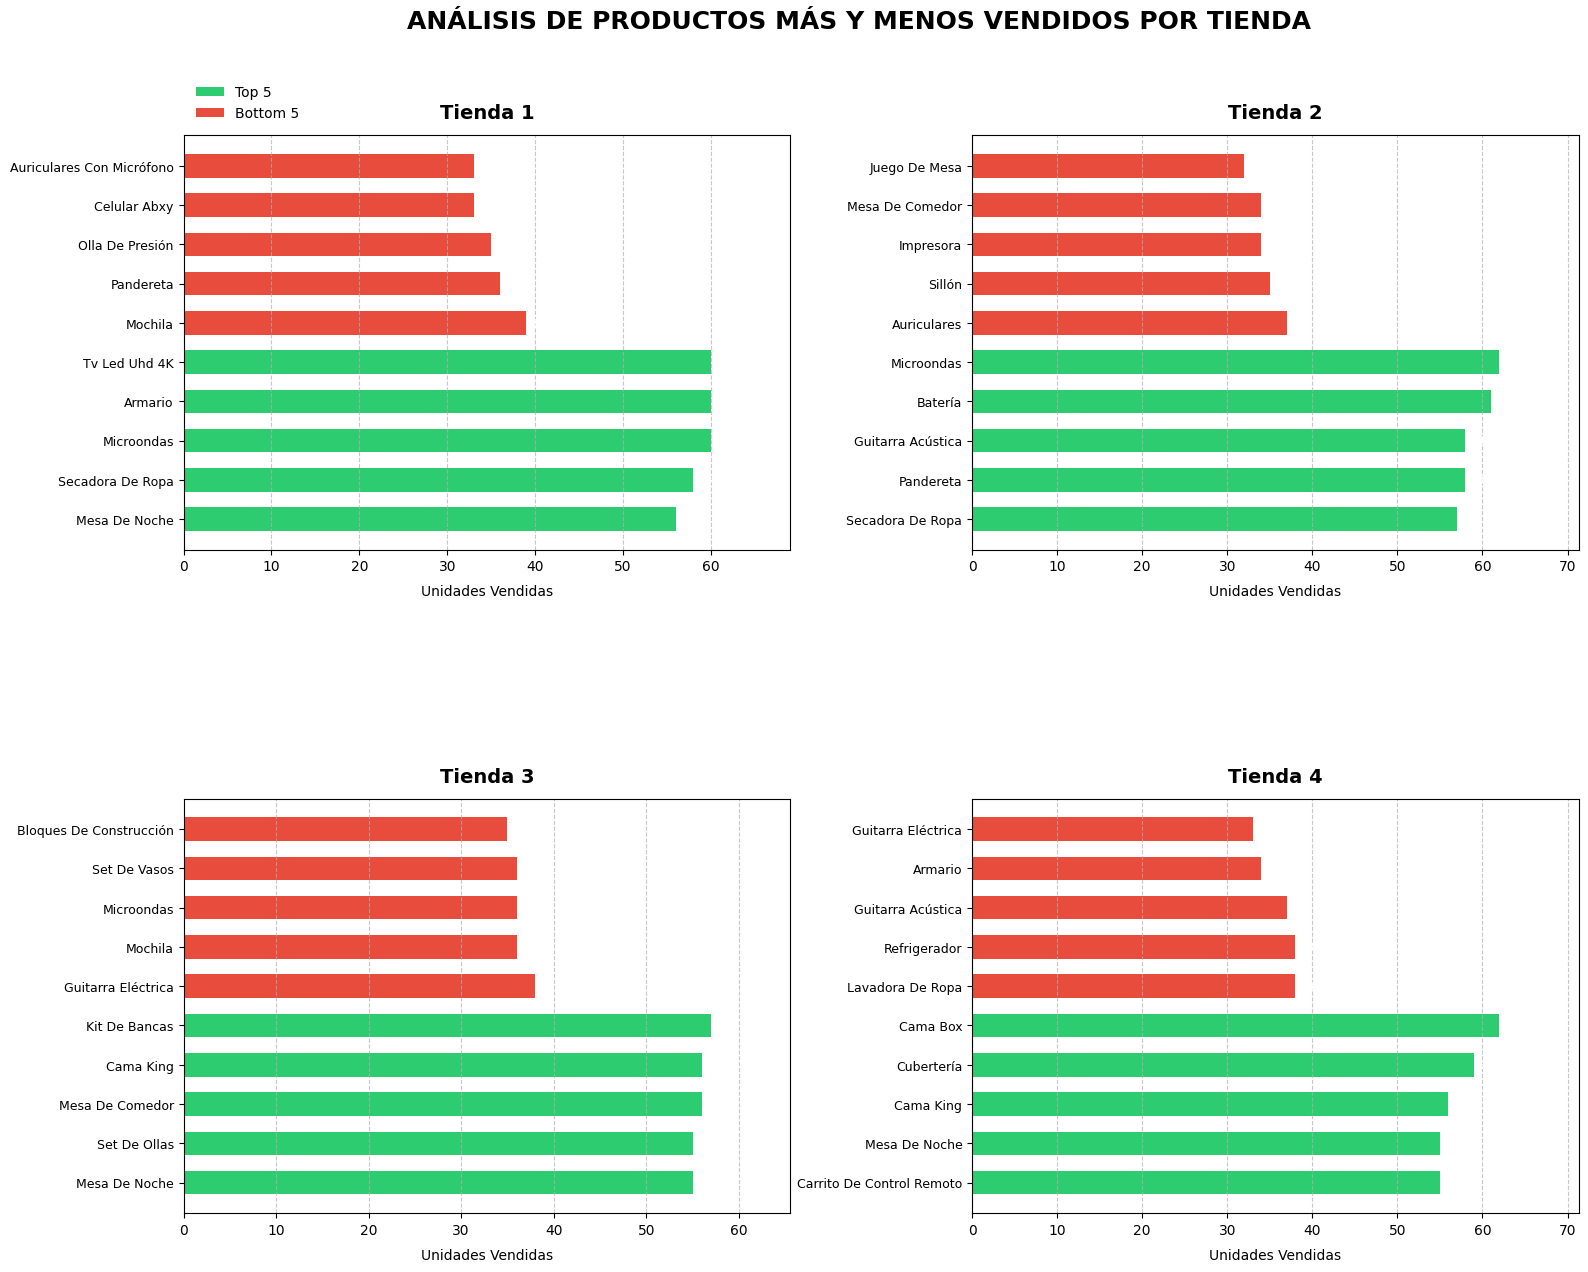

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Configuración mejorada de URLs
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
]

# Configurar figura principal
fig, axs = plt.subplots(2, 2, figsize=(18, 14))
plt.subplots_adjust(hspace=0.6, wspace=0.3)
fig.suptitle('ANÁLISIS DE PRODUCTOS MÁS Y MENOS VENDIDOS POR TIENDA',
            fontsize=18, y=0.97, fontweight='bold')

# Paleta de colores profesional
COLORES = {'top': '#2ecc71', 'bottom': '#e74c3c'}
KEYWORDS_FILTER = ['programación', 'ciencia de datos', 'python', 'iniciando', 'tutorial','Dashboards','Pover Bi']

for i, url in enumerate(urls):
    ax = axs[i//2, i%2]
    try:
        # 1. Carga y limpieza inicial
        df = pd.read_csv(url)
        df.columns = df.columns.str.strip().str.title()

        # 2. Verificar columna crítica
        columna_producto = 'Producto'
        if columna_producto not in df.columns:
            raise KeyError(f"Columna '{columna_producto}' no encontrada")

        # 3. Limpieza avanzada de datos
        df_clean = df.copy()

        # Eliminar filas con metadatos y encabezados
        df_clean = df_clean[
            ~df_clean[columna_producto].str.contains('|'.join(KEYWORDS_FILTER), case=False, na=False)
            & (df_clean[columna_producto] != columna_producto)  # Encabezados duplicados
            & (df_clean[columna_producto].notna())
        ]

        # Normalización de texto
        df_clean[columna_producto] = (
            df_clean[columna_producto]
            .str.strip()
            .str.replace(r'\s+', ' ', regex=True)
            .str.title()
        )

        # 4. Calcular ventas por producto
        ventas = (
            df_clean.groupby(columna_producto, observed=True)
            .size()
            .reset_index(name='Ventas')
            .sort_values('Ventas', ascending=False)
        )

        # 5. Manejo de casos especiales
        if ventas.empty:
            raise ValueError("No hay datos válidos después de la limpieza")

        # 6. Preparar datos para gráfico
        top = ventas.head(5).sort_values('Ventas', ascending=True)
        bottom = ventas.tail(5).sort_values('Ventas', ascending=False)

        # 7. Crear gráfico combinado
        ax.barh(top[columna_producto], top['Ventas'],
               color=COLORES['top'], label='Top 5', height=0.6)
        ax.barh(bottom[columna_producto], bottom['Ventas'],
               color=COLORES['bottom'], label='Bottom 5', height=0.6)

        # 8. Personalización del gráfico
        max_ventas = ventas['Ventas'].max()
        ax.set_title(f'Tienda {i+1}', fontsize=14, pad=12, fontweight='semibold')
        ax.set_xlabel('Unidades Vendidas', fontsize=10, labelpad=8)
        ax.set_xlim(0, max_ventas * 1.15)
        ax.tick_params(axis='y', labelsize=9)
        ax.grid(axis='x', linestyle='--', alpha=0.7)

        # 9. Etiquetas inteligentes
        for rect in ax.patches:
            width = rect.get_width()
            color = 'black' if width < max_ventas * 0.3 else 'white'
            ax.annotate(f'{width}',
                        xy=(width, rect.get_y() + rect.get_height()/2),
                        xytext=(3, 0),
                        textcoords="offset points",
                        ha='left', va='center',
                        fontsize=8, color=color, weight='bold')

        # 10. Leyenda unificada
        if i == 0:
            ax.legend(bbox_to_anchor=(0, 1.15), loc='upper left',
                     frameon=False, fontsize=10)

    except Exception as e:
        ax.text(0.5, 0.5, f"Error: {str(e)}",
               ha='center', va='center', color='red')
        ax.set_title(f'Tienda {i+1} - Error', color='red')
        ax.axis('off')

plt.show()

# 5. Envío promedio por tienda

In [25]:
!pip install matplotlib --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 76.7 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


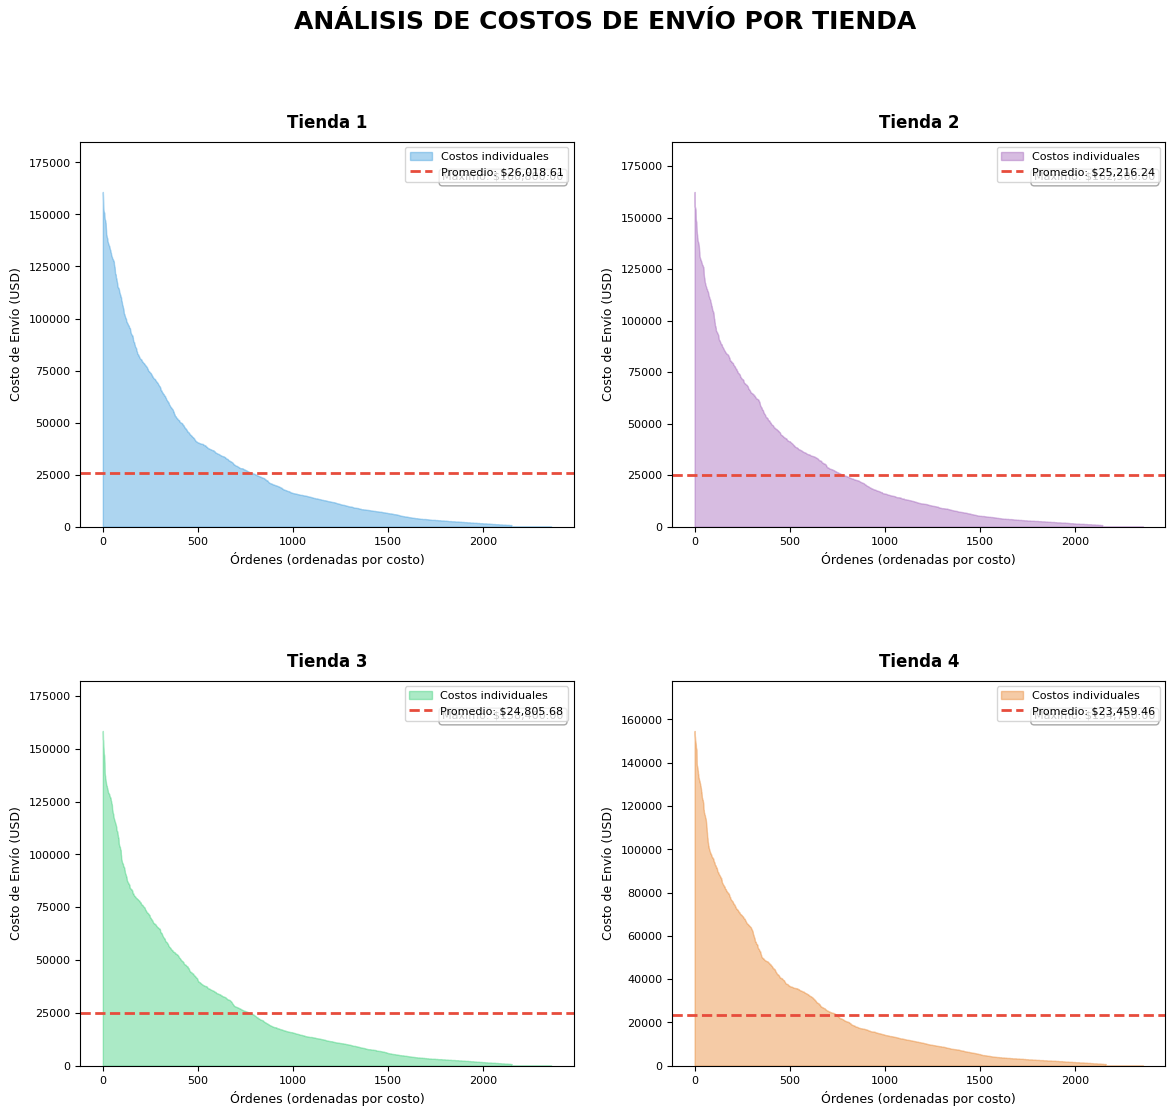

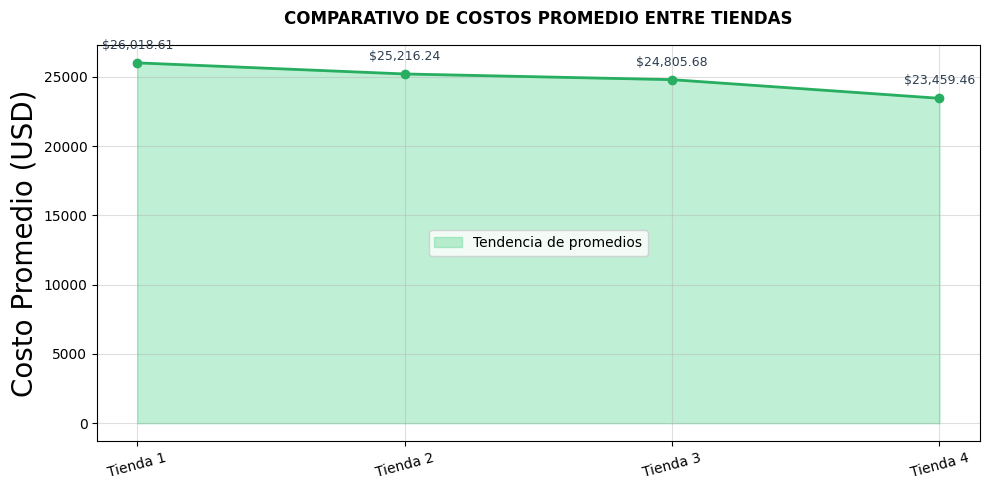

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# Configuración mejorada de URLs
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",  # <- Notar %20
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
]

# Configurar figura y estilo
plt.style.use
fig, axs = plt.subplots(2,2 , figsize=(14, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.2)
fig.suptitle('ANÁLISIS DE COSTOS DE ENVÍO POR TIENDA',
            fontsize=18, y=0.99, fontweight='bold')

# Paleta de colores y parámetros
COLORES = ['#3498db', '#9b59b6', '#2ecc71', '#e67e22']
METRICAS = { }

for i, url in enumerate(urls):
    ax = axs[i//2, i%2]
    try:
        # Carga y limpieza de datos
        df = pd.read_csv(url)
        df.columns = df.columns.str.strip().str.title()

        # Verificar columna crítica
        columna_envio = 'Costo De Envío'
        if columna_envio not in df.columns:
            raise KeyError(f"Columna '{columna_envio}' no encontrada")

        # Limpieza y conversión numérica
        df[columna_envio] = pd.to_numeric(
            df[columna_envio],
            errors='coerce'
        ).fillna(0)

        # Cálculo de métricas
        promedio = df[columna_envio].mean()
        max_envio = df[columna_envio].max()
        min_envio = df[columna_envio].min()

        # Ordenar por costo de envío
        df = df.sort_values(by=columna_envio, ascending=False)

        # Almacenar métricas para visualización final
        METRICAS[f'Tienda {i+1}'] = {
            'Promedio': promedio,
            'Máximo': max_envio,
            'Datos': df[columna_envio]
        }

        # Crear gráfico de área
        datos_ordenados = df[columna_envio].sort_values(ascending=False).reset_index(drop=True)
        ax.fill_between(
            datos_ordenados.index,
            datos_ordenados.values,
            color=COLORES[i],
            alpha=0.4,
            label='Costos individuales'
        )

        # Línea de promedio
        ax.axhline(
            promedio,
            color='#e74c3c',
            linestyle='--',
            linewidth=2,
            label=f'Promedio: ${promedio:,.2f}'
        )

        # Personalización
        ax.set_title(f'Tienda {i+1}', fontsize=12, pad=10, fontweight='semibold')
        ax.set_xlabel('Órdenes (ordenadas por costo)', fontsize=9)
        ax.set_ylabel('Costo de Envío (USD)', fontsize=9)
        ax.tick_params(axis='both', labelsize=8)
        ax.set_ylim(0, max_envio * 1.15)
        ax.legend(loc='upper right', fontsize=8)

        # Etiqueta de máximo
        ax.annotate(f'Máximo: ${max_envio:,.2f}',
                   xy=(0.98, 0.92),
                   xycoords='axes fraction',
                   ha='right', va='top',
                   fontsize=8,
                   bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='grey', alpha=0.7))

    except Exception as e:
        ax.text(0.5, 0.5, f"Error: {str(e)}",
               ha='center', va='center', color='red')
        ax.set_title(f'Tienda {i+1} - Error', color='red')
        ax.axis('off')

# Gráfico comparativo adicional
fig2, ax2 = plt.subplots(figsize=(10, 5))
promedios = [v['Promedio'] for v in METRICAS.values()]
tiendas = list(METRICAS.keys())

ax2.fill_between(
    tiendas,
    promedios,
    color='#2ecc71',
    alpha=0.3,
    label='Tendencia de promedios'
)
ax2.plot(tiendas, promedios, marker='o', color='#27ae60', linewidth=2)

for i, (tienda, prom) in enumerate(zip(tiendas, promedios)):
    ax2.annotate(f'${prom:,.2f}',
                xy=(i, prom),
                xytext=(0, 10),
                textcoords='offset points',
                ha='center',
                fontsize=9,
                color='#2c3e50')

ax2.set_title('COMPARATIVO DE COSTOS PROMEDIO ENTRE TIENDAS', pad=15, fontweight='bold')
ax2.set_ylabel('Costo Promedio (USD)', fontsize=20)
ax2.tick_params(axis='x', rotation=15)
ax2.grid(True, alpha=0.4)
ax2.legend()

plt.tight_layout()
plt.show()

# **6.  Análisis del desempeño geográfico**


🔍 Procesando Tienda 1
📊 Datos válidos: 2279 registros


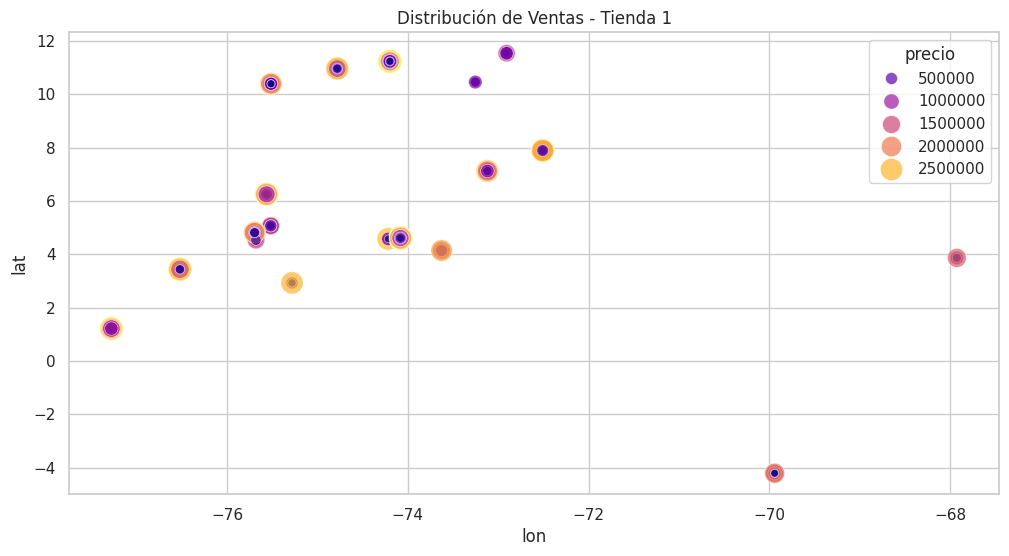


🔍 Procesando Tienda 2
📊 Datos válidos: 2251 registros


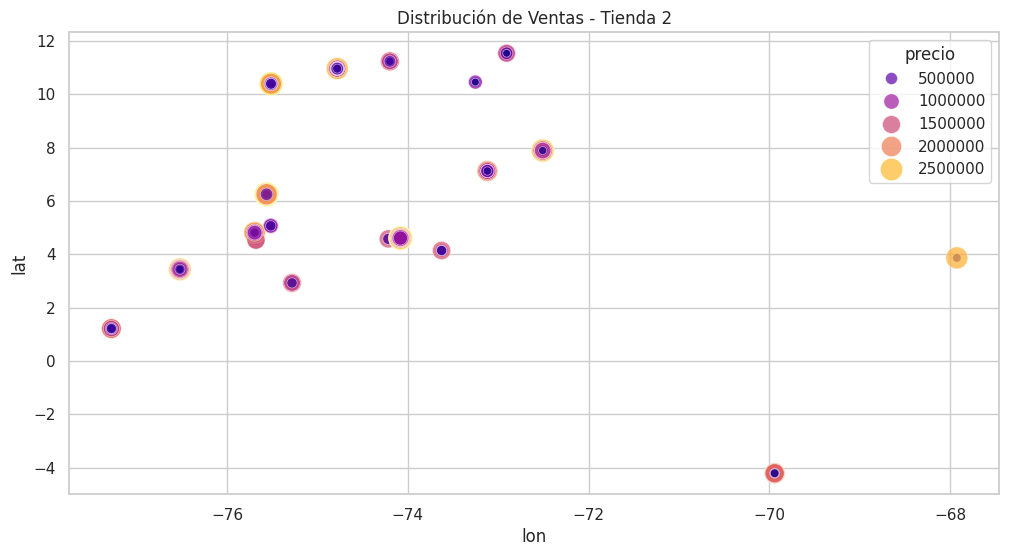


🔍 Procesando Tienda 3
📊 Datos válidos: 2267 registros


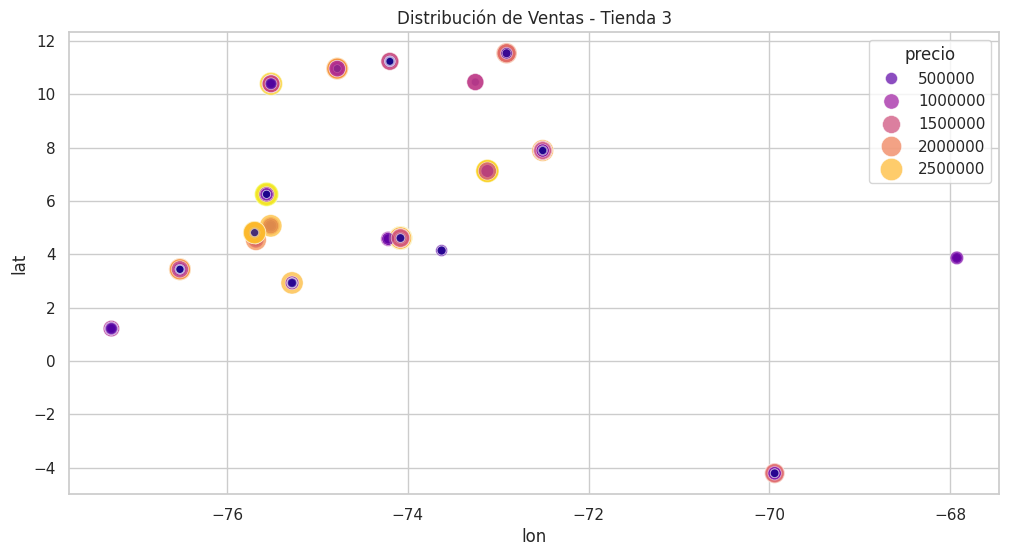


🔍 Procesando Tienda 4
📊 Datos válidos: 2277 registros


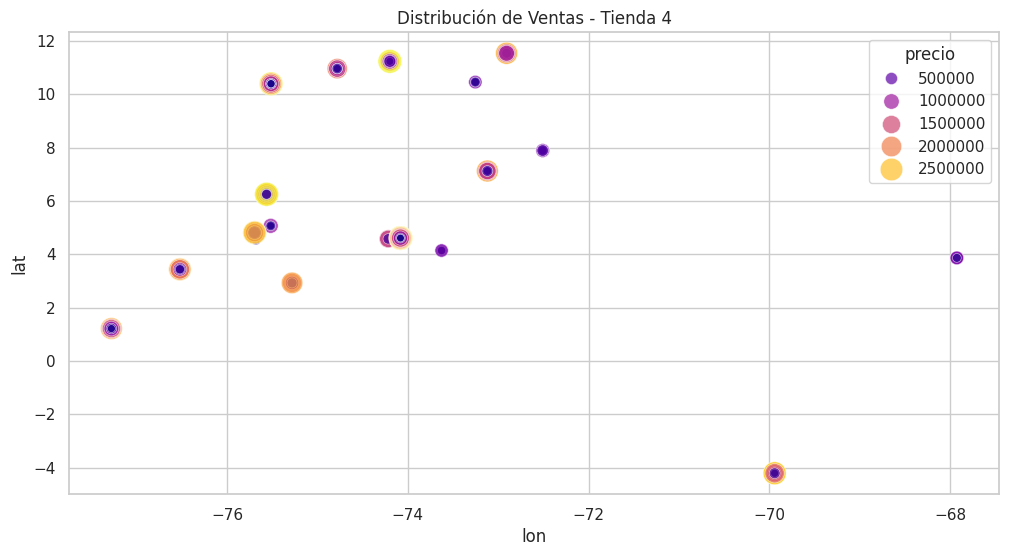

In [66]:
!pip install folium seaborn matplotlib --upgrade
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, folium, numpy as np
from folium.plugins import HeatMap
from IPython.display import display, HTML

# ========== CAMBIO 1: Configurar backend de matplotlib ==========
%matplotlib inline

# Configuración
CONFIG = {
    'urls': [
         "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
         "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
         "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
         "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
    ],
    'filtros': {
        'keywords': ['programación', 'ciencia de datos', 'python', 'tutorial'],
        'rango_lat': (-90, 90),
        'rango_lon': (-180, 180)
    },
    'visualizacion': {
        'heatmap_radius': 15,
        'top_marcadores': 5,
        'paleta_colores': 'plasma',
        'tiles': 'CartoDB dark_matter'
    }
}

# Funciones
def cargar_datos(url):
    try:
        df = pd.read_csv(url)
        df.columns = df.columns.str.strip().str.lower()

        # Validación de columnas
        if not {'lat', 'lon', 'precio', 'producto'}.issubset(df.columns):
            raise ValueError("Columnas críticas faltantes")

        # Filtrado
        mask = (
            df['producto'].str.contains('|'.join(CONFIG['filtros']['keywords']), case=False, na=False) |
            ~df['lat'].between(*CONFIG['filtros']['rango_lat']) |
            ~df['lon'].between(*CONFIG['filtros']['rango_lon'])
        )
        df = df[~mask].copy()

        # Conversión numérica
        for col in ['lat', 'lon', 'precio']:
            df[col] = pd.to_numeric(df[col], errors='coerce')

        df = df.dropna(subset=['lat', 'lon', 'precio'])
        return df

    except Exception as e:
        print(f"🚨 Error en {url}: {str(e)}")
        return pd.DataFrame()

def crear_mapa(df, tienda_num):
    if df.empty: return

    # ========== CAMBIO 2: Configuración de mapa interactivo ==========
    mapa = folium.Map(
        location=[df['lat'].median(), df['lon'].median()],
        zoom_start=12,
        tiles=CONFIG['visualizacion']['tiles']
    )

    HeatMap(
        data=df[['lat', 'lon', 'precio']].values.tolist(),
        radius=CONFIG['visualizacion']['heatmap_radius'],
        gradient={'0.4': 'blue', '0.65': 'lime', '1': 'red'}
    ).add_to(mapa)

    # Añadir marcadores
    for _, row in df.nlargest(CONFIG['visualizacion']['top_marcadores'], 'precio').iterrows():
        folium.CircleMarker(
            location=[row['lat'], row['lon']],
            radius=10,
            color='gold',
            fill=True,
            popup=f"${row['precio']:.2f} - {row['producto']}"
        ).add_to(mapa)

    # ========== CAMBIO 3: Mostrar mapa directamente en Colab ==========
    display(mapa)
    return mapa

def analisis_geo(df, tienda_num):
    if df.empty: return

    # Gráfico 1: Scatter plot
    plt.figure(figsize=(12, 6))
    sns.scatterplot(
        x='lon', y='lat',
        hue='precio', size='precio',
        data=df,
        palette=CONFIG['visualizacion']['paleta_colores'],
        sizes=(30, 300),
        alpha=0.7
    )
    plt.title(f'Distribución de Ventas - Tienda {tienda_num}')
    plt.show()  # Forzar renderizado

    # Gráfico 2: Heatmap interactivo
    crear_mapa(df, tienda_num)

# Ejecución
if __name__ == "__main__":
    for i, url in enumerate(CONFIG['urls'], 1):
        print(f"\n{'='*40}")
        print(f"🔍 Procesando Tienda {i}")
        df = cargar_datos(url)

        if not df.empty:
            print(f"📊 Datos válidos: {len(df)} registros")
            analisis_geo(df, i)
        else:
            print("⚠️ Sin datos para mostrar")